In [1]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet

In [2]:
data = np.loadtxt('../Data/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [3]:
np.shape(data)

(124, 15)

In [4]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [5]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]

regressor = ElasticNet()

In [6]:
# Create the random grid
param_grid = { 'l1_ratio': np.linspace(0,1,10000),
              }
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[2160. 1434. 1074.  870.  788.  719.  857.  788.  559. 1017.  870.  860.
  709.  731.  742.  704.  617.  966.  702.  616.  300.  438.  444.  511.
  477.  483.  494.  461.  489.  527.  461.  468.  498.  492.  520.  463.
  478.  459.  429.  462.  487.]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 4 folds for each of 10000 candidates, totalling 40000 fits


c:\Users\kyan3\miniconda3\envs\toyota\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 10000 is smaller than n_iter=20000. Running 10000 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [7]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"])

In [8]:
regressor.fit(x_train,y_train)

ElasticNet(l1_ratio=1.0)

In [10]:
np.sqrt(np.mean((regressor.predict(x_test)-y_test)**2))

162.76587705783226

In [11]:
np.sqrt(np.mean((regressor.predict(x_stest)-y_stest)**2))

197.3936504841673

In [9]:
np.mean((np.abs(regressor.predict(x_train)-y_train))/y_train)

0.21006002955255054

In [12]:
np.mean((np.abs(regressor.predict(x_test)-y_test))/y_test)

0.20599888060138916

In [13]:
np.mean((np.abs(regressor.predict(x_stest)-y_stest))/y_stest)

0.12831217801626763

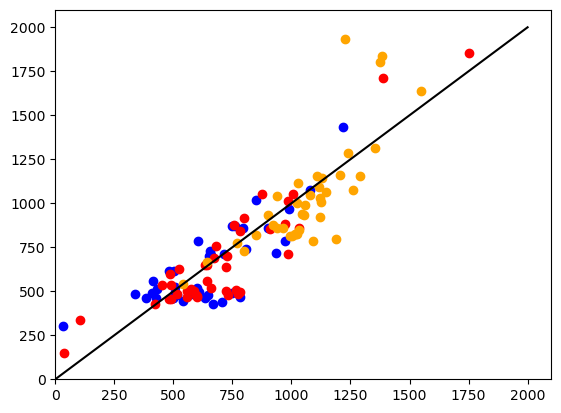

In [57]:
fig,ax=plt.subplots()
ax.scatter(regressor.predict(x_train),y_train,c="blue")
ax.scatter(regressor.predict(x_test),y_test,c="red")
ax.scatter(regressor.predict(x_stest),y_stest,c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')